## 비행기 탑승 승객 예측
- 데이터 : sm.datasets.get_rdataset("AirPassengers")

In [2]:
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
raw_set = sm.datasets.get_rdataset("AirPassengers")
raw_set.data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [4]:
raw = raw_set.data

In [5]:
raw.time = pd.date_range('1974-01-01', periods = len(raw), freq = 'M')
raw

,time,value
0,1974-01-31,112
1,1974-02-28,118
2,1974-03-31,132
3,1974-04-30,129
4,1974-05-31,121
...,...,...
139,1985-08-31,606
140,1985-09-30,508
141,1985-10-31,461
142,1985-11-30,390


In [6]:
raw['month'] = raw.time.dt.month
raw

,time,value,month
0,1974-01-31,112,1
1,1974-02-28,118,2
2,1974-03-31,132,3
3,1974-04-30,129,4
4,1974-05-31,121,5
...,...,...,...
139,1985-08-31,606,8
140,1985-09-30,508,9
141,1985-10-31,461,10
142,1985-11-30,390,11


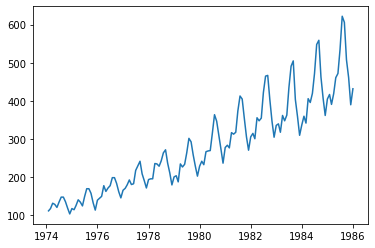

In [7]:
plt.plot(raw.time, raw.value)
plt.show()

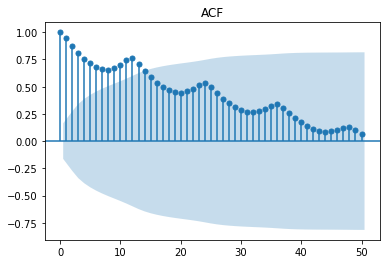

In [8]:
sm.graphics.tsa.plot_acf(raw.value, lags = 50, use_vlines = True, title = "ACF")
plt.show()

In [9]:
result = sm.OLS.from_formula(formula = 'value ~ C(month) - 1', data = raw).fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.032    
Dependent Variable: value            AIC:                1794.2145
Date:               2021-07-23 12:39 BIC:                1829.8522
No. Observations:   144              Log-Likelihood:     -885.11  
Df Model:           11               F-statistic:        1.424    
Df Residuals:       132              Prob (F-statistic): 0.169    
R-squared:          0.106            Scale:              13937.   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
C(month)[1]     241.7500  34.0794  7.0937 0.0000 174.3377 309.1623
C(month)[2]     235.0000  34.0794  6.8957 0.0000 167.5877 302.4123
C(month)[3]     270.1667  34.0794  7.9276 0.0000 202.7543 337.5790
C(month)[4]     267.0833  34.0794  7.8371 0.0000 199.6710 334.4957
C(month)[5]     271.8333  34.0794  7.9765 0.0000 204.4210 339.2457
C(month)[6]     311.6667  34.0794  9.1453 0.0000 244.2543 379.0790
C(month)[7]     351.3333  34.0794 10.3093 0.0000 283.9210 418.7457
C(month)[8]     351.0833  34.0794 10.3019 0.0000 283.6710 418.4957
C(month)[9]     302.4167  34.0794  8.8739 0.0000 235.0043 369.8290
C(month)[10]    266.5833  34.0794  7.8224 0.0000 199.1710 333.9957
C(month)[11]    232.8333  34.0794  6.8321 0.0000 165.4210 300.2457
C(month)[12]    261.8333  34.0794  7.6830 0.0000 194.4210 329.2457
------------------------------------------------------------------
Omnibus:              18.813        Durbin-Watson:           0.027
Prob(Omnibus):        0.000         Jarque-Bera (JB):        6.959
Skew:                 0.266         Prob(JB):                0.031
Kurtosis:             2.063         Condition No.:           1    
==================================================================

"""

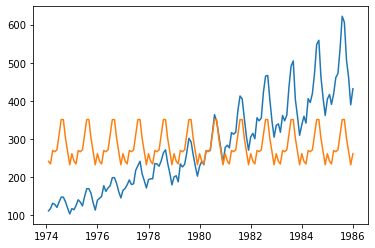

In [10]:
plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show() # 파란색 : 실제값, 노란색 : 예측값

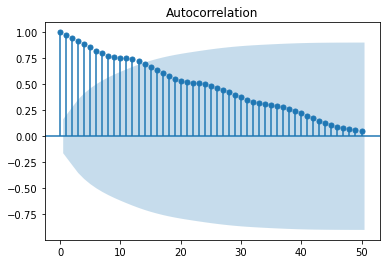

In [11]:
sm.graphics.tsa.plot_acf(result.resid, lags = 50, use_vlines = True)
plt.show()

In [16]:
raw.value.diff(12)[:13]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    3.0
Name: value, dtype: float64

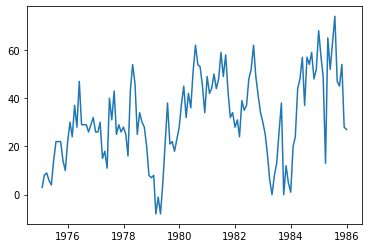

In [12]:
plt.plot(raw.time[12:], raw.value.diff(12).dropna())
plt.show()

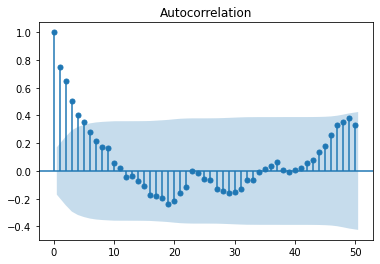

In [13]:
sm.graphics.tsa.plot_acf(raw.value.diff(12).dropna(), lags = 50, use_vlines = True)
plt.show()

### ARMA

In [17]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [18]:
import statsmodels
import numpy as np

In [19]:
raw.head()

,time,value,month
0,1974-01-31,112,1
1,1974-02-28,118,2
2,1974-03-31,132,3
3,1974-04-30,129,4
4,1974-05-31,121,5


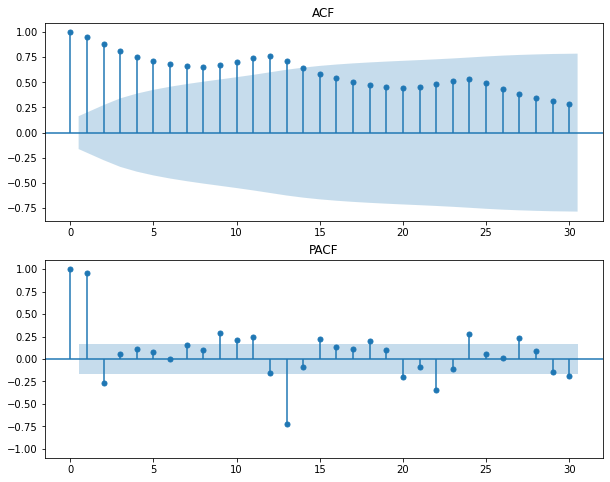

In [20]:
plt.figure(figsize = (10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags = 30, ax = plt.subplot(211), title = 'ACF')
sm.graphics.tsa.plot_pacf(raw.value, lags = 30, ax = plt.subplot(212), title = 'PACF')
plt.ylim(-1.1, 1.1)
plt.show()

In [23]:
fit = statsmodels.tsa.arima_model.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:                     ARMA(1, 1)   Log Likelihood                -700.874
Method:                       css-mle   S.D. of innovations             31.121
Date:                Fri, 23 Jul 2021   AIC                           1409.748
Time:                        12:44:18   BIC                           1421.628
Sample:                             0   HQIC                          1414.575
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         281.4464     53.619      5.249      0.000     176.356     386.537
ar.L1.value     0.9373      0.030     31.045      0.000       0.878       0.996
ma.L1.value     0.4264      0.091      4.682      0.000       0.248       0.605
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0669           +0.0000j            1.0669            0.0000
MA.1           -2.3452           +0.0000j            2.3452            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
fit.forecast(steps = 3) # 예측값 3개만 보기

(array([453.90018948, 443.09074492, 432.95883873]),
 array([31.12123487, 52.62823769, 65.97127309]),
 array([[392.90368999, 514.89668898],
        [339.94129447, 546.24019537],
        [303.65751946, 562.260158  ]]))

In [25]:
from itertools import product

result = []
for p, q in product(range(4), range(2)):
    model = statsmodels.tsa.arima_model.ARMA(raw.value, (p, q)).fit()
    result.append({"p": p, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})
    
result = pd.DataFrame(result)

In [26]:
display(result)

,p,q,LLF,AIC,BIC
0,0,0,-893.183790,1790.367580,1796.307207
1,0,1,-806.431263,1618.862527,1627.771967
2,1,0,-711.089689,1428.179379,1437.088819
3,1,1,-700.874135,1409.748270,1421.627523
4,2,0,-702.819392,1413.638784,1425.518037
5,2,1,-699.124612,1408.249223,1423.098290
6,3,0,-700.171153,1410.342306,1425.191373
7,3,1,-696.301449,1404.602898,1422.421778


In [27]:
fit = statsmodels.tsa.arima_model.ARMA(raw.value, (3,1)).fit() # 최적의 p, q
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:                     ARMA(3, 1)   Log Likelihood                -696.301
Method:                       css-mle   S.D. of innovations             28.965
Date:                Fri, 23 Jul 2021   AIC                           1404.603
Time:                        12:45:32   BIC                           1422.422
Sample:                             0   HQIC                          1411.843
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.7945        nan        nan        nan         nan         nan
ar.L1.value     2.0929   3.42e-05   6.13e+04      0.000       2.093       2.093
ar.L2.value    -1.5756   2.75e-05  -5.73e+04      0.000      -1.576      -1.576
ar.L3.value     0.4827   4.22e-06   1.14e+05      0.000       0.483       0.483
ma.L1.value    -0.8469      0.035    -24.156      0.000      -0.916      -0.778
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2            1.1321           -0.8889j            1.4394           -0.1059
AR.3            1.1321           +0.8889j            1.4394            0.1059
MA.1            1.1808           +0.0000j            1.1808            0.0000
-----------------------------------------------------------------------------
"""

### ARIMA

In [30]:
raw_set = sm.datasets.get_rdataset("AirPassengers")
raw_set.data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [31]:
raw = raw_set.data

In [32]:
raw.time = pd.date_range('1974-01-01', periods = len(raw), freq = 'M')
raw

,time,value
0,1974-01-31,112
1,1974-02-28,118
2,1974-03-31,132
3,1974-04-30,129
4,1974-05-31,121
...,...,...
139,1985-08-31,606
140,1985-09-30,508
141,1985-10-31,461
142,1985-11-30,390


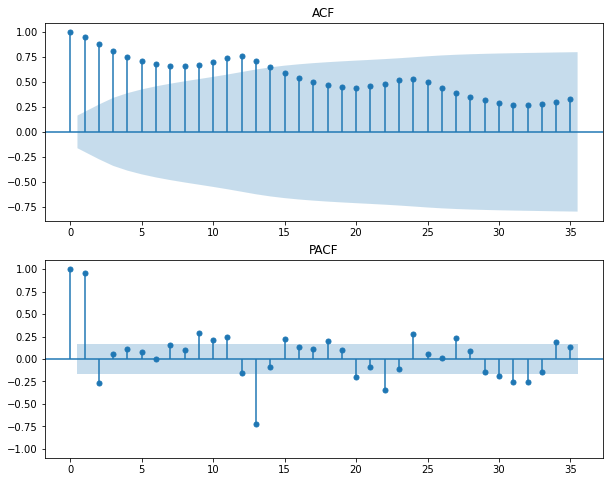

In [33]:
plt.figure(figsize = (10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags = 35, ax = plt.subplot(211), title = 'ACF')
sm.graphics.tsa.plot_pacf(raw.value, lags = 35, ax = plt.subplot(212), title = 'PACF')
plt.ylim(-1.1, 1.1)
plt.show()

In [34]:
# ARIMA(1,1,0) 모델링
fit = sm.tsa.arima.ARIMA(raw.value, order = (1,1,0)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Fri, 23 Jul 2021   AIC                           1401.852
Time:                        12:51:30   BIC                           1407.778
Sample:                             0   HQIC                          1404.260
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.42   Prob(JB):                         0.09
Heteroskedasticity (H):               8.35   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

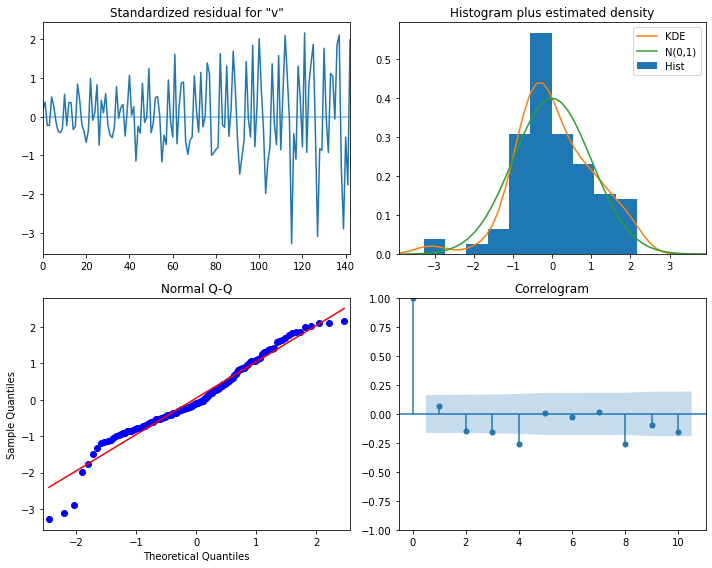

In [35]:
# 잔차 진단
fit.plot_diagnostics(figsize = (10, 8))
plt.tight_layout()
plt.show()

In [36]:
from itertools import product

result = []
for p, d, q in product(range(4), range(2), range(4)):
    model = sm.tsa.arima.ARIMA(raw.value, order = (p, d, q)).fit()
    result.append({"p": p, "d": d, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})

In [37]:
# 모형 최적모수 선택
result = pd.DataFrame(result)
display(result)

,p,d,q,LLF,AIC,BIC
0,0,0,0,-893.183791,1790.367581,1796.307208
1,0,0,1,-806.431273,1618.862545,1627.771985
2,0,0,2,-757.063072,1522.126144,1534.005397
3,0,0,3,-725.681028,1461.362056,1476.211123
4,0,1,0,-705.954559,1413.909117,1416.871962
5,0,1,1,-696.628787,1397.257575,1403.183264
6,0,1,2,-695.546731,1397.093462,1405.981996
7,0,1,3,-693.454574,1394.909148,1406.760526
8,1,0,0,-711.090266,1428.180531,1437.089971
9,1,0,1,-700.874361,1409.748723,1421.627976


In [38]:
# 최적 ARIMA(3,1,3) 모델링
fit = sm.tsa.arima.ARIMA(raw.value, order = (3,1,3)).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -665.969
Date:                Fri, 23 Jul 2021   AIC                           1345.938
Time:                        12:54:05   BIC                           1366.678
Sample:                             0   HQIC                          1354.366
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0097      0.158      6.370      0.000       0.699       1.320
ar.L2          0.1663      0.255      0.652      0.515      -0.334       0.667
ar.L3         -0.6231      0.151     -4.120      0.000      -0.919      -0.327
ma.L1         -0.9369      0.107     -8.748      0.000      -1.147      -0.727
ma.L2         -0.6756      0.167     -4.055      0.000      -1.002      -0.349
ma.L3          0.8912      0.092      9.650      0.000       0.710       1.072
sigma2       620.5652     70.967      8.744      0.000     481.472     759.658
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.35   Prob(JB):                         0.13
Heteroskedasticity (H):               6.39   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
fit.forecast(steps = 3)

144    471.214429
145    477.361070
146    523.439179
Name: predicted_mean, dtype: float64